## Getting Started With TensorFlow

#### What is TensorFlow?
Tensorflow is an open-source software library for Machine Intelligence

#### Prerequisites
- Install TensorFlow
- Have some Python programming experience
- Know at least a little bit about arrays
- Ideally, know something about machine learning. However, if you know little or nothing about machine learning, you'll still probably be able to follow along relatively well. 

TensorFlow provides mutliple APIs.
- The lowest level API--TensorFlow Core--provides you with complete programming control. This is best for machine learning researchers and other people who need find levels of control over their models.
- The higher level APIs are built on top of TensorFlow Core. These are typcially easier to learn and use than TensorFlow Core. For example, a high-level API like tf.contrib learn helps you manage data sets, estimators and training.

We'll learn:
- TensorFlow Core (will give you a great mental model of how things are working internally)
- tf.contrib.learn (will help you use a higher level compact API)

### Tensors

The central unit of data in TensorFlow is the __tensor__. A tensor consists of a set of primitive values shaped into an array of dimensions. The number of dimensions of a tensor is called its __rank__.

Here are some examples:

In [1]:
3 # a rank 0 tensor; this is a scalar with shape []
[1. , 2., 3.] # a rank 1 tensor; this is a vector with shape [3]
[[1., 2., 3.], [4., 5., 6.]] # a rank 2 tensor; a matrix with shape [2, 3]
[[[1., 2., 3.]], [[7., 8., 9.]]] # a rank 3 tensor with shape [2, 1, 3]

[[[1.0, 2.0, 3.0]], [[7.0, 8.0, 9.0]]]

### TensorFlow Core tutorial
#### Importing TensorFlow
The canonical import statement for TensorFlow programs is as follows:

In [2]:
import tensorflow as tf

This gives Python access to all of TensorFlow's classes, methods, and symbols. Most of the documentation assumes you have already done this.

#### The Computational Graph
You can think of TensorFlow Core programs as consisting of two discrete sections:
1. Building the computational graph.
2. Running the computational graph. 

A __computational graph__ is a series of TensorFlow operations arranged into a graph of nodes. Each node takes zero or more tensors as inputs and produces a tensor as an output. One type of node is a constant. It takes no inputs and outputs a value that it stores internally. We'll create two constant tensors called `node1` and `node2`

In [3]:
node1 = tf.constant(3.0, tf.float32)
node2 = tf.constant(4.0) # also tf.float32 implicitly
print(node1, node2)

Tensor("Const:0", shape=(), dtype=float32) Tensor("Const_1:0", shape=(), dtype=float32)


Notice that printing the nodes does not output values `3.0` and `4.0` as you might think. Actually they are nodes that would produce these values when evaluated. To evaluate nodes, we have to run the computational graph in a __session__. A session encapsulates the control and state of the TensorFlow runtime. 

Here's how we can create a `Session` object and run enough the parts of the computational graph that evaluate `node1` and `node2`. 

In [4]:
sess = tf.Session()
print(sess.run([node1, node2]))

[3.0, 4.0]


We can make more complicated computations by combining `Tensor` nodes with operations (which are technically also nodes). Here's how we would add our two constant nodes

In [5]:
node3 = tf.add(node1, node2)
print("node3: ", node3)
print("sess.run(node3): ", sess.run(node3))

node3:  Tensor("Add:0", shape=(), dtype=float32)
sess.run(node3):  7.0


TensorFlow also has a utility called TensorBoard that can display a picture of the computational graph. Here is a screenshot showing how TensorBoard visualizes the graph:

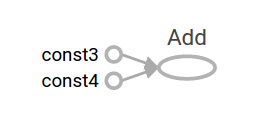

As it stands, this graph isn't very interesting. It always produces a constant result. However we can parameterize our graphs to accept externat inputs called __placeholders__. A __placeholder__ is a promise to provide a value later.

In [6]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
adder_node = a + b # + provides a shortcut for tf.add(a, b)

If you didn't notice, those three lines are sort of like a lambda, or a function, where we provide two input parameters (a and b) and then an operation on them. You can evaluate this graph using the feed_dict parameters to specify Tensors that provides concrete values to these placeholders:

In [7]:
print(sess.run(adder_node, {a: 3, b:4.5}))
print(sess.run(adder_node, {a:[1,3], b:[2,4]}))

7.5
[ 3.  7.]


In TensorBoard, the graph looks like this:
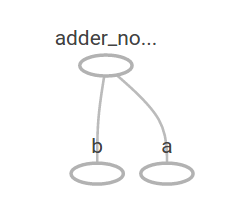

We can make the computational graph more complex by adding another operation. 

In [8]:
add_and_triple = adder_node * 3.
print(sess.run(add_and_triple, {a: 3, b:4.5}))

22.5
